<a href="https://colab.research.google.com/github/fawazdhianabil/Project/blob/main/Sentiment_Analisis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [1]:
!pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import re     
import matplotlib.pyplot as plt
import csv
import sys
from nlp_id.lemmatizer import Lemmatizer 
lemmatizer = Lemmatizer() 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string, unicodedata
from nlp_id.stopword import StopWord
from sklearn.model_selection import GridSearchCV

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#**Import Data**

In [4]:
df = pd.read_excel('dataset_indihome.xlsx')

In [5]:
df =df[0:5000]

#**Preprocessing**

### Menghapus Baris Terduplikasi

In [6]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,https://twitter.com/Denise_Tweety/status/15089...,2022-03-29 23:57:46+00:00,sinting nih @FirstMediaCares seminggu wifi je...,sinting nih @FirstMediaCares seminggu wifi je...,1.508957e+18,"{'username': 'Denise_Tweety', 'id': 51407976, ...",1,0,...,NaN,NaN,NaN,NaN,NaN,"[{'username': 'FirstMediaCares', 'id': 1557875...",NaN,NaN,NaN,NaN
1,1,1,https://twitter.com/Anzlnahrvi/status/15089563...,2022-03-29 23:56:53+00:00,Indihome pagi pagi bikin emosi anying,Indihome pagi pagi bikin emosi anying,1.508956e+18,"{'username': 'Anzlnahrvi', 'id': 1498572765816...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,https://twitter.com/muhamma09485383/status/150...,2022-03-29 23:54:57+00:00,"Selamat pagi teman teman, mau ngasih info nih ...","Selamat pagi teman teman, mau ngasih info nih ...",1.508956e+18,"{'username': 'muhamma09485383', 'id': 14873251...",0,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['AktivitasTanpaBatas', 'InternetnyaIndonesia']",NaN
3,3,3,https://twitter.com/kinosukina/status/15089555...,2022-03-29 23:53:32+00:00,Bila kita membiasakan diri dengan sifat pemaaf...,Bila kita membiasakan diri dengan sifat pemaaf...,1.508956e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN
4,4,4,https://twitter.com/kinosukina/status/15089545...,2022-03-29 23:49:46+00:00,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,1.508955e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,https://twitter.com/orangkasa/status/150737844...,2022-03-25 15:26:41+00:00,@crybely @sbyfess kaum indihome,@crybely @sbyfess kaum indihome,1.507378e+18,"{'username': 'orangkasa', 'id': 11031636632742...",1,0,...,NaN,NaN,NaN,1.507378e+18,"{'username': 'crybely', 'id': 1312781156035649...","[{'username': 'crybely', 'id': 131278115603564...",NaN,NaN,NaN,NaN
4996,4996,4996,https://twitter.com/olivia9iant/status/1507378...,2022-03-25 15:26:04+00:00,"Min @IndiHome ga tertolong ya min, sampe calen...","Min @IndiHome ga tertolong ya min, sampe calen...",1.507378e+18,"{'username': 'olivia9iant', 'id': 76344889, 'd...",0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,"[{'username': 'IndiHome', 'id': 10756730589318...",NaN,NaN,NaN,NaN
4997,4997,4997,https://twitter.com/jooyeonsyg/status/15073781...,2022-03-25 15:25:38+00:00,indihome ngeselin bangettt,indihome ngeselin bangettt,1.507378e+18,"{'username': 'jooyeonsyg', 'id': 1471143100361...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,4998,https://twitter.com/dkyeo_om/status/1507377504...,2022-03-25 15:22:57+00:00,euh kayaknya tl gue gak muncul karena pake ind...,euh kayaknya tl gue gak muncul karena pake ind...,1.507378e+18,"{'username': 'dkyeo_om', 'id': 135645299391526...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

**Menghapus username & account_name**

In [7]:
df['content']

0       sinting nih @FirstMediaCares  seminggu wifi je...
1                   Indihome pagi pagi bikin emosi anying
2       Selamat pagi teman teman, mau ngasih info nih ...
3       Bila kita membiasakan diri dengan sifat pemaaf...
4       Alhamdulillah....\nRabu pagi ini cuaca cerah\n...
                              ...                        
4995                      @crybely @sbyfess kaum indihome
4996    Min @IndiHome ga tertolong ya min, sampe calen...
4997                           indihome ngeselin bangettt
4998    euh kayaknya tl gue gak muncul karena pake ind...
4999    @accientsys Hai, Sobat. Silakan kirimkan nomor...
Name: content, Length: 5000, dtype: object

In [8]:
text_clean = []

for idx, text in enumerate(df['content']):
    clean_text = str(text).replace(str(df['user'][idx]), '')
    clean_text = re.sub('@[\w]+','',clean_text)
    text_clean.append(clean_text)
    
df['Text_Clean'] = text_clean

In [9]:
df['Text_Clean'].head(20)

0     sinting nih   seminggu wifi jeblok dan akhirny...
1                 Indihome pagi pagi bikin emosi anying
2     Selamat pagi teman teman, mau ngasih info nih ...
3     Bila kita membiasakan diri dengan sifat pemaaf...
4     Alhamdulillah....\nRabu pagi ini cuaca cerah\n...
5                 Sinyal indihome knp bgst bgt sih ajg🤧
6                         IndiHome internetnya stabil ✨
7     Pakai IndiHome jaringan lancar jaya dan aman t...
8     Ini drakor emang cocok buat yg lagi bucin....B...
9                               Fup indihome eek banget
10     Kak, guna Anna bantu permintaannya silakan in...
11    Demi apapun…\n\n WIFI INDIHOME KENAPA JELEK BA...
12     indihome what in the hell is wrong w u this time
13     iya kali yaa indihome tpi buat buka yt dkk bi...
14     halah males. tolong skrg kalo nelpon cs indih...
15    Nikmati keseruan Film- Film IndiHome di Weeken...
16     Halo, Kak Mia. Bayar ya, Kak. Wila informasik...
17    24 Jam non stop internetan dengan Indihome

##**Case Folding**

In [10]:
def Case_Folding(text):
    # Hapus non-ascii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Menghapus Tanda Baca
    text = re.sub(r'[^\w]|_',' ', text)
    
    # Menghapus Angka
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub(r"\b\d+\b", " ", text)
    
    # Mengubah text menjadi lowercase
    text = text.lower()
    
    # Menghapus white space
    text = re.sub('[\s]+', ' ', text)
    
    return text

In [11]:
df['Text_Clean'] = df['Text_Clean'].apply(Case_Folding)
df['Text_Clean'].head(20)

0     sinting nih seminggu wifi jeblok dan akhirnyaa...
1                 indihome pagi pagi bikin emosi anying
2     selamat pagi teman teman mau ngasih info nih k...
3     bila kita membiasakan diri dengan sifat pemaaf...
4     alhamdulillah rabu pagi ini cuaca cerah bikin ...
5                  sinyal indihome knp bgst bgt sih ajg
6                           indihome internetnya stabil
7     pakai indihome jaringan lancar jaya dan aman t...
8     ini drakor emang cocok buat yg lagi bucin bene...
9                               fup indihome eek banget
10    kak guna anna bantu permintaannya silakan info...
11    demi apapun wifi indihome kenapa jelek banget ...
12     indihome what in the hell is wrong w u this time
13    iya kali yaa indihome tpi buat buka yt dkk bis...
14    halah males tolong skrg kalo nelpon cs indihom...
15    nikmati keseruan film film indihome di weekend...
16    halo kak mia bayar ya kak wila informasikan bi...
17    jam non stop internetan dengan indihome ak

##**Lemmatisasi**

In [12]:
df['Text_Clean'] = df['Text_Clean'].apply(lemmatizer.lemmatize)
df['Text_Clean'].head()

0    sinting nih minggu wifi jeblok dan akhirnyaaa ...
1                indihome pagi pagi bikin emosi anying
2    selamat pagi teman teman mau ngasih info nih k...
3    bila kita biasa diri dengan sifat maaf maka di...
4    alhamdulillah rabu pagi ini cuaca cerah bikin ...
Name: Text_Clean, dtype: object

##**Stemming Sastrawi**

In [13]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [14]:
df['Text_Clean'] = df['Text_Clean'].apply(stemmer.stem)
df['Text_Clean'].head()

0    sinting nih minggu wifi jeblok dan akhirnyaaa ...
1                indihome pagi pagi bikin emosi anying
2    selamat pagi teman teman mau ngasih info nih k...
3    bila kita biasa diri dengan sifat maaf maka di...
4    alhamdulillah rabu pagi ini cuaca cerah bikin ...
Name: Text_Clean, dtype: object

##**Stemming Tala**

In [15]:
class TalaStemmFactory:
    def __init__(self):
        stopword = [line.rstrip('\n') for line in open('stopword.txt')]
        stopword_kd = [line.rstrip('\n') for line in open('stopword_kd.txt')]
        self.stopword = stopword
        self.stopword_kd = stopword_kd

    def getTalaStemmer(self):
        return TalaStemmer(self.stopword, self.stopword_kd)

In [16]:
class TalaStemmer:
    awalan1 = [
        ['meng',  ''],  ['menya', 's'], ['menyi', 's'], ['menyu', 's'], ['menye', 's'],
        ['menyo', 's'], ['meny',  's'], ['men',   ''],  ['mema',  'p'], ['memi',  'p'],
        ['memu',  'p'], ['meme',  'p'], ['memo',  'p'], ['mem',   ''],  ['me',    ''],
        ['peng',  ''],  ['penya', 's'], ['penyi', 's'], ['penyu', 's'], ['penye', 's'],
        ['penyo', 's'], ['peny',  's'], ['pen',   ''],  ['pema',  'p'], ['pemi',  'p'],
        ['pemu',  'p'], ['peme',  'p'], ['pemo',  'p'], ['pem',   ''],  ['di',    ''],
        ['ter',   ''],  ['ke',   '']
    ]
    awalan2 = [
        ['ber', ''],    ['bel', ''],    ['be', ''],     ['per', ''],    ['pel', ''],    ['pe', '']
    ]

    akhiran1 = ['lah', 'kah',   'pun']
    akhiran2 = ['nya', 'ku',    'mu']
    akhiran3 = ['kan', 'an',    'i']

    def __init__(self, stopword, stopword_kd):
        self.stopword = stopword
        self.stopword_kd = stopword_kd

    def stem(self, word):
        if (word in self.stopword_kd):
            index = self.stopword_kd.index(word)
            return self.stopword_kd[index]
        word, success = self.hilangkanAwalan(self.awalan1, word)
        if (success):
            word, success = self.hilangAkhiran(self.akhiran1, word)
            if not success:
                return word
            word, success = self.hilangAkhiran(self.akhiran2, word)
            if not success:
                return word
            word, success = self.hilangAkhiran(self.akhiran3, word)
            if not success:
                return word
            word, success = self.hilangkanAwalan(self.awalan2, word)
        else:
            word, success = self.hilangkanAwalan(self.awalan2, word)
            word, success = self.hilangAkhiran(self.akhiran1, word)
            word, success = self.hilangAkhiran(self.akhiran2, word)
            word, success = self.hilangAkhiran(self.akhiran3, word)
        return word

    def hilangAkhiran(self, akhiran, word):
        success = False
        for i in akhiran:
            ind = len(i) * -1
            if (word[ind:] == i):
                result = word[:ind]
                if (len(result) > 2):
                    word = result
                    success = True
                    break
        return word, success

    def hilangkanAwalan(self, awalan, word):
        success = False
        for i in awalan:
            ind = len(i[0])
            if (word[:ind] == i[0]):
                result = word[ind:]
                if (len(result) > 2):
                    word = result
                    success = True
                    break
        return word, success

In [17]:
# Membuat stemmer
factory = TalaStemmFactory()
stemmer = factory.getTalaStemmer()

In [18]:
df['Text_Clean_Tala']=df['Text_Clean'].apply(stemmer.stem)

In [19]:
df.head()

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Text_Clean,Text_Clean_Tala
0,0,0,https://twitter.com/Denise_Tweety/status/15089...,2022-03-29 23:57:46+00:00,sinting nih @FirstMediaCares seminggu wifi je...,sinting nih @FirstMediaCares seminggu wifi je...,1.508957e+18,"{'username': 'Denise_Tweety', 'id': 51407976, ...",1,0,...,NaN,NaN,NaN,"[{'username': 'FirstMediaCares', 'id': 1557875...",NaN,NaN,NaN,NaN,sinting nih minggu wifi jeblok dan akhirnyaaa ...,sinting nih minggu wifi jeblok dan akhirnyaaa ...
1,1,1,https://twitter.com/Anzlnahrvi/status/15089563...,2022-03-29 23:56:53+00:00,Indihome pagi pagi bikin emosi anying,Indihome pagi pagi bikin emosi anying,1.508956e+18,"{'username': 'Anzlnahrvi', 'id': 1498572765816...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,indihome pagi pagi bikin emosi anying,indihome pagi pagi bikin emosi anying
2,2,2,https://twitter.com/muhamma09485383/status/150...,2022-03-29 23:54:57+00:00,"Selamat pagi teman teman, mau ngasih info nih ...","Selamat pagi teman teman, mau ngasih info nih ...",1.508956e+18,"{'username': 'muhamma09485383', 'id': 14873251...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['AktivitasTanpaBatas', 'InternetnyaIndonesia']",NaN,selamat pagi teman teman mau ngasih info nih k...,selamat pagi teman teman mau ngasih info nih k...
3,3,3,https://twitter.com/kinosukina/status/15089555...,2022-03-29 23:53:32+00:00,Bila kita membiasakan diri dengan sifat pemaaf...,Bila kita membiasakan diri dengan sifat pemaaf...,1.508956e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,NaN,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN,bila kita biasa diri dengan sifat maaf maka di...,bila kita biasa diri dengan sifat maaf maka di...
4,4,4,https://twitter.com/kinosukina/status/15089545...,2022-03-29 23:49:46+00:00,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,1.508955e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,NaN,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN,alhamdulillah rabu pagi ini cuaca cerah bikin ...,alhamdulillah rabu pagi ini cuaca cerah bikin ...


##**Slang Word Standardization**

In [20]:
slang_dictionary = pd.read_csv('colloquial-indonesian-lexicon.csv')
slang_dict = pd.Series(slang_dictionary['formal'].values,index=slang_dictionary['slang']).to_dict()

In [21]:
slang_dictionary

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,enggak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [22]:
def Slangwords(text):
    for word in text.split():
        if word in slang_dict.keys():
            text = text.replace(word, slang_dict[word])
    return text

In [23]:
df['Text_Clean'] = df['Text_Clean'].apply(Slangwords)
df['Text_Clean'] = df['Text_Clean'].str.replace('mhs', 'mahasiswa')
df['Text_Clean'].head()

0    sinting nih minggu wifi jeblok dan akhirnyaaa ...
1                indihome pagi pagi bikin emosi anying
2    selamat pagi teman teman mau mengasih info nih...
3    bila kita biasa diri dengan sifat maaf maka di...
4    alhamdulillah rabu pagi ini cuaca cerah bikin ...
Name: Text_Clean, dtype: object

##**Stopword Removal**

In [24]:
stopword = StopWord() 

In [25]:
df['Text_Clean'] = df['Text_Clean'].apply(stopword.remove_stopword)
df['Text_Clean'].head()

0    sinting nih wifi jeblok akhirnyaaa full intern...
1                indihome pagi pagi bikin emosi anying
2    selamat pagi teman teman mengasih info nih kal...
3    sifat maaf tentram hati tenang aktivitas onlin...
4    pagi cuaca cerah bikin semangat langkah moga u...
Name: Text_Clean, dtype: object

##**Unwanted Word Removal**

In [26]:
unwanted_words = ['indihome','cowok','jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'uaddown', 'weareuad', 'lam', 'https', 'igshid']
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')

def RemoveUnwantedwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if not word in unwanted_words]
    return ' '.join(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
df['Text_Clean'] = df['Text_Clean'].apply(RemoveUnwantedwords)
df['Text_Clean'].head()

0    sinting nih wifi jeblok akhirnyaaa full intern...
1                         pagi pagi bikin emosi anying
2    selamat pagi teman teman mengasih info nih kal...
3    sifat maaf tentram hati tenang aktivitas onlin...
4    pagi cuaca cerah bikin semangat langkah moga u...
Name: Text_Clean, dtype: object

##**Remove Word Less Than 3 Letter**

In [28]:
df['Text_Clean'] = df['Text_Clean'].str.findall('\w{3,}').str.join(' ')
df['Text_Clean'].head()

0    sinting nih wifi jeblok akhirnyaaa full intern...
1                         pagi pagi bikin emosi anying
2    selamat pagi teman teman mengasih info nih kal...
3    sifat maaf tentram hati tenang aktivitas onlin...
4    pagi cuaca cerah bikin semangat langkah moga u...
Name: Text_Clean, dtype: object

##**Split Word**

In [29]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [30]:
df['Text_Clean'].apply(split_word)

0       [sinting, nih, wifi, jeblok, akhirnyaaa, full,...
1                      [pagi, pagi, bikin, emosi, anying]
2       [selamat, pagi, teman, teman, mengasih, info, ...
3       [sifat, maaf, tentram, hati, tenang, aktivitas...
4       [pagi, cuaca, cerah, bikin, semangat, langkah,...
                              ...                        
4995                                               [kaum]
4996    [min, enggak, tolong, min, calendarpun, proble...
4997                                        [mengesalkan]
4998                  [euh, kayak, enggak, muncul, pakai]
4999    [hai, sobat, sila, kirim, nomor, internet, nam...
Name: Text_Clean, Length: 5000, dtype: object

In [31]:
df['Text_Clean_split'] = df['Text_Clean'].apply(split_word)
df['Text_Clean_split'].head()

0    [sinting, nih, wifi, jeblok, akhirnyaaa, full,...
1                   [pagi, pagi, bikin, emosi, anying]
2    [selamat, pagi, teman, teman, mengasih, info, ...
3    [sifat, maaf, tentram, hati, tenang, aktivitas...
4    [pagi, cuaca, cerah, bikin, semangat, langkah,...
Name: Text_Clean_split, dtype: object

## Kolom Bulan Tahun

In [32]:
df['date']=pd.to_datetime(df['date'])
df

,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Text_Clean,Text_Clean_Tala,Text_Clean_split
0,0,0,https://twitter.com/Denise_Tweety/status/15089...,2022-03-29 23:57:46+00:00,sinting nih @FirstMediaCares seminggu wifi je...,sinting nih @FirstMediaCares seminggu wifi je...,1.508957e+18,"{'username': 'Denise_Tweety', 'id': 51407976, ...",1,0,...,NaN,NaN,"[{'username': 'FirstMediaCares', 'id': 1557875...",NaN,NaN,NaN,NaN,sinting nih wifi jeblok akhirnyaaa full intern...,sinting nih minggu wifi jeblok dan akhirnyaaa ...,"[sinting, nih, wifi, jeblok, akhirnyaaa, full,..."
1,1,1,https://twitter.com/Anzlnahrvi/status/15089563...,2022-03-29 23:56:53+00:00,Indihome pagi pagi bikin emosi anying,Indihome pagi pagi bikin emosi anying,1.508956e+18,"{'username': 'Anzlnahrvi', 'id': 1498572765816...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pagi pagi bikin emosi anying,indihome pagi pagi bikin emosi anying,"[pagi, pagi, bikin, emosi, anying]"
2,2,2,https://twitter.com/muhamma09485383/status/150...,2022-03-29 23:54:57+00:00,"Selamat pagi teman teman, mau ngasih info nih ...","Selamat pagi teman teman, mau ngasih info nih ...",1.508956e+18,"{'username': 'muhamma09485383', 'id': 14873251...",0,0,...,NaN,NaN,NaN,NaN,NaN,"['AktivitasTanpaBatas', 'InternetnyaIndonesia']",NaN,selamat pagi teman teman mengasih info nih kal...,selamat pagi teman teman mau ngasih info nih k...,"[selamat, pagi, teman, teman, mengasih, info, ..."
3,3,3,https://twitter.com/kinosukina/status/15089555...,2022-03-29 23:53:32+00:00,Bila kita membiasakan diri dengan sifat pemaaf...,Bila kita membiasakan diri dengan sifat pemaaf...,1.508956e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN,sifat maaf tentram hati tenang aktivitas onlin...,bila kita biasa diri dengan sifat maaf maka di...,"[sifat, maaf, tentram, hati, tenang, aktivitas..."
4,4,4,https://twitter.com/kinosukina/status/15089545...,2022-03-29 23:49:46+00:00,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,Alhamdulillah....\nRabu pagi ini cuaca cerah\n...,1.508955e+18,"{'username': 'kinosukina', 'id': 2602416942, '...",0,0,...,NaN,NaN,NaN,"{'longitude': 110.006125, 'latitude': -8.206926}","{'fullName': 'Yogyakarta, Indonesia', 'name': ...",NaN,NaN,pagi cuaca cerah bikin semangat langkah moga u...,alhamdulillah rabu pagi ini cuaca cerah bikin ...,"[pagi, cuaca, cerah, bikin, semangat, langkah,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,https://twitter.com/orangkasa/status/150737844...,2022-03-25 15:26:41+00:00,@crybely @sbyfess kaum indihome,@crybely @sbyfess kaum indihome,1.507378e+18,"{'username': 'orangkasa', 'id': 11031636632742...",1,0,...,1.507378e+18,"{'username': 'crybely', 'id': 1312781156035649...","[{'username': 'crybely', 'id': 131278115603564...",NaN,NaN,NaN,NaN,kaum,kaum indihome,[kaum]
4996,4996,4996,https://twitter.com/olivia9iant/status/1507378...,2022-03-25 15:26:04+00:00,"Min @IndiHome ga tertolong ya min, sampe calen...","Min @IndiHome ga tertolong ya min, sampe calen...",1.507378e+18,"{'username': 'olivia9iant', 'id': 76344889, 'd...",0,0,...,NaN,NaN,"[{'username': 'IndiHome', 'id': 10756730589318...",NaN,NaN,NaN,NaN,min enggak tolong min calendarpun problem load...,min ga tolong ya min sampe calendarpun problem...,"[min, enggak, tolong, min, calendarpun, proble..."
4997,4997,4997,https://twitter.com/jooyeonsyg/status/15073781...,2022-03-25 15:25:38+00:00,indihome ngeselin bangettt,indihome ngeselin bangettt,1.507378e+18,"{'username': 'jooyeonsyg', 'id': 1471143100361...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mengesalkan,indihome ngeselin bangettt,[mengesalkan]
4998,4998,4998,https://twitter.com/dkyeo_om/status/1507377504...,2022-03-25 15:22:57+00:00,euh kayaknya tl gue gak muncul

## Pelabelan Kolom Sentiment

In [33]:
# Daftar Kata-kata Positif Bahasa Indonesia
df_positive = pd.read_csv('positive.txt', sep='\t')
list_positive = list(df_positive.iloc[::,0])
# Daftar Kata-kata Negatif Bahasa Indonesia
df_negative = pd.read_csv('negative.txt', sep='\t')
list_negative = list(df_negative.iloc[::,0])
        
# Menghitung kata-kata positif/negatif pada data teks dan menentukan sentimennya   
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in list_positive):
            score += 1
    for word in text:
        if (word in list_negative):
            score -= 1
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [34]:
hasil = df['Text_Clean_split'].apply(sentiment_analysis_lexicon_indonesia)
hasil = list(zip(*hasil))
df['polarity_score'] = hasil[0]
df['polarity'] = hasil[1]
df.polarity.value_counts()

positive    1904
neutral     1781
negative    1315
Name: polarity, dtype: int64

In [35]:
df['polarity']

0       negative
1        neutral
2        neutral
3        neutral
4       positive
          ...   
4995     neutral
4996    negative
4997     neutral
4998    negative
4999    positive
Name: polarity, Length: 5000, dtype: object

In [36]:
### Pie Plot Sentiment

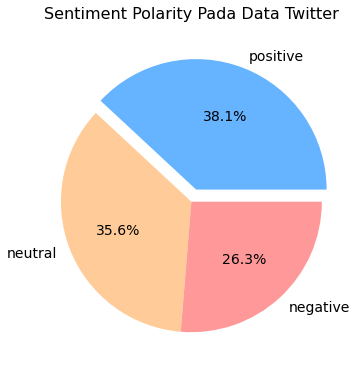

In [37]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x = sizes, labels = labels, colors=colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity Pada Data Twitter', fontsize = 16, pad = 20)
plt.show()

## 10 Tweet Dengan Sentiment Positif dan Negatif Tertinggi

In [38]:
pd.set_option('display.max_colwidth', 3000)
positive_review = df[df['polarity'] == 'positive']
positive_review = positive_review[['Text_Clean_split', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_review.index += 1
positive_review[0:10]

,Text_Clean_split,polarity_score,polarity
1,"[team, seleksi, tahap, tahap, temu, grandfinal, borobudur, cup, yuk, dukung, team, jago, saksi, menang, team, jago, grandfinal, jam, wib, sobat, indihomeborobudurcup, internetnyaindonesia]",9,positive
2,"[halo, kak, miminki, prosedur, pasang, telepon, rumah, lokasi, tercover, jaring, sedia, pasang, lokasi, kakak, registrasi, paket, telepon, only, plasa, telkom, terima, kasih, joro]",8,positive
3,"[kerja, santai, bentar, mendengarkan, lagu, bikin, happy, langsung, play, happy, songs, spotify, internetnya, lancar, mendengarkannya, pakai, langsung, deh, mendengarkan, smile, katy, perry, then, memakai, smile, and, happy, sore, internetnyaindonesia, aktivitastanpabatas]",8,positive
4,"[halo, sobat, maaf, lambat, respons, dryan, cek, jaring, nomor, internet, pantau, stabil, pakai, device, hubung, jaring, lokasi, kendala, tunggu, konfirmasi, terima, kasih, dryan]",8,positive
5,"[halo, sob, ranking, nih, poin, ribu, ranking, poin, sobat, sob, bayangkan, poin, rupiah, enggak, tuh, yuk, daftar, sobat, kejar, poin, internetnyaindonesia, aktivitastanpabatas]",7,positive
6,"[hai, kak, ramon, estimasi, pasang, jam, hitung, jaring, lokasi, langgan, sedia, terima, kasih, mariya]",7,positive
7,"[hai, kak, narsha, caris, informasi, estimasi, pasang, jam, hitung, jaring, lokasi, langgan, sedia, terima, kasih, caris]",7,positive
8,"[asik, menonton, musik, mancanegara, channel, mtv, live, lagu, lagu, update, langsung, nikmat]",7,positive
9,"[halo, kak, tia, isa, informasi, estimasi, pasang, jam, hitung, jaring, lokasi, langgan, sedia, kakak, saksi, streaming, liga, nrbwfwckaliaz]",7,positive
10,"[selamat, sob, sibuk, aktivitas, enjoy, enjoy, your, live, enjoy, your, day, enjoy, your, work, with, aktivitastanpabatas, internetnyaindonesia, indihomembois]",7,positive


In [39]:
pd.set_option('display.max_colwidth', 3000)
negative_review = df[df['polarity'] == 'negative']
negative_review = negative_review[['Text_Clean_split', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
negative_review.index += 1
negative_review[0:10]

,Text_Clean_split,polarity_score,polarity
1,"[plis, rusak, romantisasi, admin, internetnya, kayao, tahi]",-1,negative
2,"[drakoran, pakai, seru, anti, lelet, loading, aktivitastanpabatas, mhucmihquh]",-1,negative
3,"[piket, malam, aktivitastanpabatas]",-1,negative
4,"[admin, bot, orang]",-1,negative
5,"[naur, isn, that, bad]",-1,negative
6,"[besar, tagih, myrepublic, first, media, tweeps]",-1,negative
7,"[anjir, kuota, benaran, habis, nyala]",-1,negative
8,"[coba, bukti, capek, kecewa, layan]",-1,negative
9,"[bayare, larang, trobel, kiro]",-1,negative
10,"[lot, deh, buset]",-1,negative


# Word Cloud

## Word Cloud Teks Processed

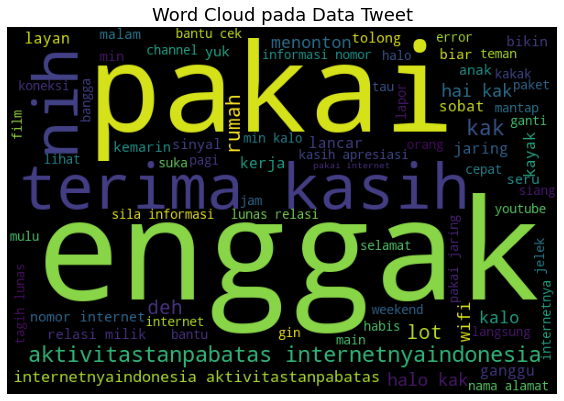

In [40]:
from wordcloud import WordCloud
list_words=''
for review in df['Text_Clean_split']:
    for word in review:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud pada Data Tweet', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## Word Cloud Negative Vs Positive

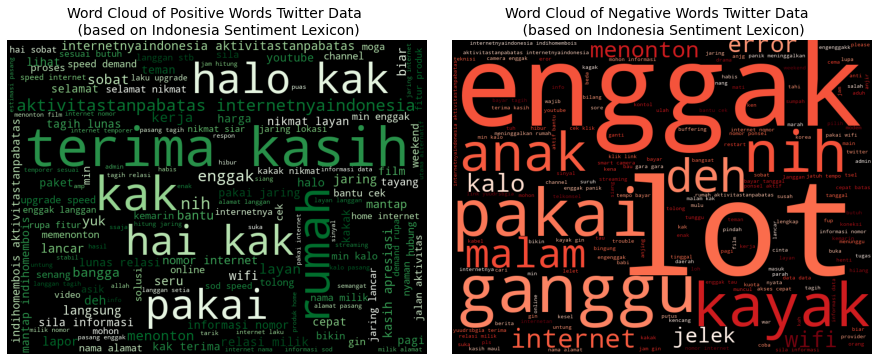

In [41]:
positive_words = positive_review['Text_Clean_split']

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words Twitter Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

negative_words = negative_review['Text_Clean_split']

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words Twitter Data  \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [42]:
df['Text_Clean']

0                                              sinting nih wifi jeblok akhirnyaaa full internet amp kabel mulu should change
1                                                                                               pagi pagi bikin emosi anying
2       selamat pagi teman teman mengasih info nih kalo internet sinyal bikin asyik aktivitastanpabatas internetnyaindonesia
3                                                                sifat maaf tentram hati tenang aktivitas online pakai orang
4            pagi cuaca cerah bikin semangat langkah moga urus mudah hasil penuh berkah urus online biar mudah sebar wilayah
                                                                ...                                                         
4995                                                                                                                    kaum
4996                                                         min enggak tolong min calendarpun problem loading malam loh min


In [43]:
df['polarity']

0       negative
1        neutral
2        neutral
3        neutral
4       positive
          ...   
4995     neutral
4996    negative
4997     neutral
4998    negative
4999    positive
Name: polarity, Length: 5000, dtype: object

##**10 Kata pada Sentimen Positif**

In [44]:
def split_word2(teks):
    temp = teks.split() # split words
    temp = " ".join(word for word in temp) # join all words

    return temp

In [45]:
# 1. WORDCLOUD CONTENT SENTIMEN NEGATIF & POSITIVE
kata_positif = pd.Series(" ".join(df[df["polarity"] == 'positive']["Text_Clean"].astype("str")).split())
kata_negatif = pd.Series(" ".join(df[df["polarity"] == 'negative']["Text_Clean"].astype("str")).split())

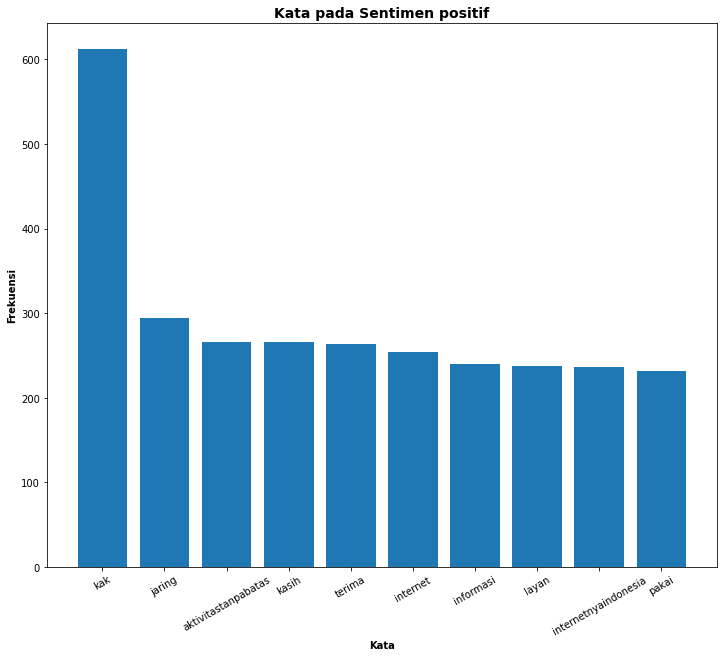

In [46]:
# SENTIMEN positif

positif_kata = kata_positif.value_counts().nlargest(10)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen positif", fontweight ='bold', fontsize = 14)

plt.xticks(positif_x, rotation = 30)

plt.show()

##**10 Kata pada Sentimen Negatif**

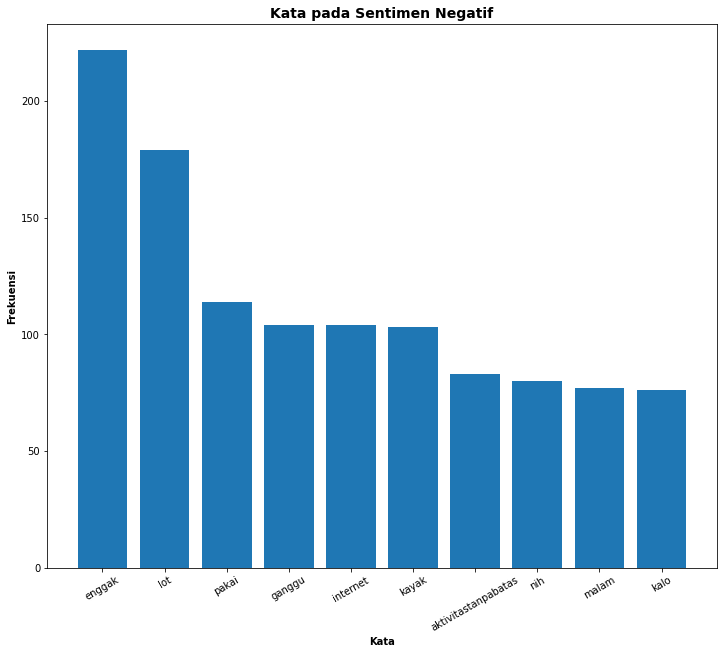

In [47]:
# SENTIMEN NEGATIF

negatif_kata = kata_negatif.value_counts().nlargest(10)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)

plt.xticks(negatif_x, rotation = 30)

plt.show()

#**Modelling dengan Sastrawi**

##**Membagi Data Menjadi Train dan Test**

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Text_Clean'],df['polarity'],test_size = 0.2,random_state = 42)

##**LabelEncoder dan TFIDF**

In [49]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=510)
Tfidf_vect.fit(df['Text_Clean'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [51]:
Train_X_Tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**Multinomial Naive Bayes**

In [52]:
#klasifikasi naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(Train_X_Tfidf.toarray(), y_train)
predicted = clf.predict(Test_X_Tfidf.toarray())
print("MultinomialNB Accuracy:" , accuracy_score(y_test,predicted))
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy: 0.649
confusion matrix:
 [[153  70  44]
 [ 23 197 130]
 [  4  80 299]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       267
           1       0.57      0.56      0.57       350
           2       0.63      0.78      0.70       383

    accuracy                           0.65      1000
   macro avg       0.68      0.64      0.65      1000
weighted avg       0.67      0.65      0.65      1000



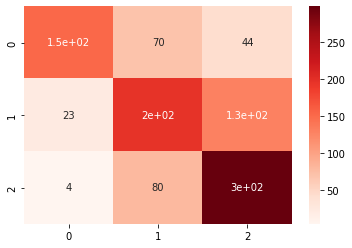

In [53]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap = 'Reds')

##**Support Vector Machine**

In [54]:
from sklearn.svm import SVC
svm = SVC().fit(Train_X_Tfidf.toarray(), y_train)
predictednb = svm.predict(Test_X_Tfidf.toarray())
print("SVC Accuracy:" , accuracy_score(y_test,predictednb))
print(f'confusion matrix:\n {confusion_matrix(y_test, predictednb)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predictednb,zero_division=0))

SVC Accuracy: 0.761
confusion matrix:
 [[164  89  14]
 [ 24 275  51]
 [  5  56 322]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       267
           1       0.65      0.79      0.71       350
           2       0.83      0.84      0.84       383

    accuracy                           0.76      1000
   macro avg       0.78      0.75      0.75      1000
weighted avg       0.77      0.76      0.76      1000



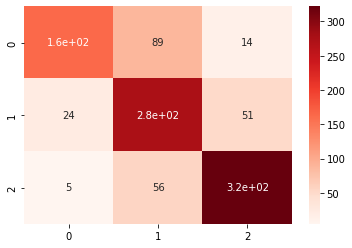

In [55]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictednb), annot=True, cmap = 'Reds')

#**Modelling dengan Sastrawi Tala**

##**Membagi Data Menjadi Train dan Test**

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Text_Clean_Tala'],df['polarity'],test_size = 0.2,random_state = 42)

##**LabelEncoder dan TFIDF**

In [57]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=510)
Tfidf_vect.fit(df['Text_Clean'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [59]:
Train_X_Tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**Multinomial Naive Bayes**

In [60]:
#klasifikasi naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(Train_X_Tfidf.toarray(), y_train)
predicted = clf.predict(Test_X_Tfidf.toarray())
print("MultinomialNB Accuracy:" , accuracy_score(y_test,predicted))
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy: 0.602
confusion matrix:
 [[134  69  64]
 [ 29 167 154]
 [  8  74 301]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.50      0.61       267
           1       0.54      0.48      0.51       350
           2       0.58      0.79      0.67       383

    accuracy                           0.60      1000
   macro avg       0.63      0.59      0.60      1000
weighted avg       0.62      0.60      0.60      1000



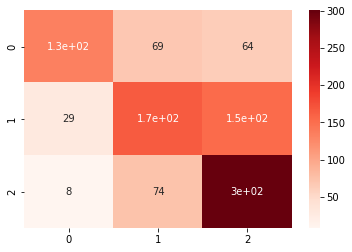

In [61]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap = 'Reds')

##**Support Vector Machine**

In [62]:
from sklearn.svm import SVC
svm = SVC().fit(Train_X_Tfidf.toarray(), y_train)
predictednb = svm.predict(Test_X_Tfidf.toarray())
print("SVC Accuracy:" , accuracy_score(y_test,predictednb))
print(f'confusion matrix:\n {confusion_matrix(y_test, predictednb)}')
print('-----------------------------------------------\n')
print(classification_report(y_test,predictednb,zero_division=0))

SVC Accuracy: 0.725
confusion matrix:
 [[145 109  13]
 [ 36 266  48]
 [ 10  59 314]]
-----------------------------------------------

              precision    recall  f1-score   support

           0       0.76      0.54      0.63       267
           1       0.61      0.76      0.68       350
           2       0.84      0.82      0.83       383

    accuracy                           0.73      1000
   macro avg       0.74      0.71      0.71      1000
weighted avg       0.74      0.72      0.72      1000



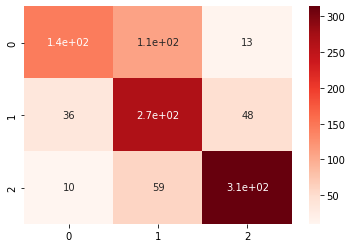

In [63]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictednb), annot=True, cmap = 'Reds')

#**Kesimpulan Akhir**

Metode Support Vector Machine dan Multinomial Naive Bayes berhasil melakukan klasifikasi pada data teks tweet terkait Indihome. Proses stemming dilakukan dengan dua package yang berbeda, yaitu Sastrawi dan Tala, hasilnya akurasi metode dengan menggunakan stemming Sastrawi lebih baik yaitu akurasi Multinomial Naive Bayes sebesar 65% dan Support Vector Machine sebesar 76%.